<a href="https://colab.research.google.com/github/jonasfiorini/Machine-Learning-Introduction/blob/master/machine-learning-algoritmos-nao-supervisionados/Alura_ML_Recomenda%C3%A7%C3%A3o_de_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pd.read_csv(uri_filmes)
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
#Separar os generos em colunas distintas (get_dummies)
generos = filmes.generos.str.get_dummies() #Separa generos em colunas e marca com 0 ou 1 de acordo com o filme
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
#Rescalar os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [4]:
#Clusterização
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)

print(f'Grupos: {modelo.labels_}')

Grupos: [0 0 1 ... 1 0 1]


In [5]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.76881213  1.62491658  1.25586269  1.14361055 -0.13511534
  -0.30451417 -0.21096449 -0.58005869  0.99408068 -0.09492563 -0.23936819
   0.57424009  0.18019781 -0.15784101 -0.27971769  0.67689653 -0.2515853
  -0.05541719 -0.05377189]
 [ 0.03718158 -0.3196422  -0.29638571 -0.2200747  -0.18224451  0.24905694
  -0.27491431  0.13342489  0.10242285 -0.18142594 -0.08959578 -0.10824969
  -0.11251862  0.02284971 -0.2201504   0.18958695 -0.19496239 -0.48661325
   0.06061937  0.02889227]
 [-0.05917995  0.3406275  -0.27380692 -0.23519333 -0.26176096 -0.56534273
   0.91733475 -0.21327094  0.10660126 -0.16723244  0.2961725   0.43844299
  -0.07638173 -0.17638272  0.67898956 -0.31600324  0.07330736  1.43790933
  

In [6]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.768812,1.624917,1.255863,1.143611,-0.135115,-0.304514,-0.210964,-0.580059,0.994081,-0.094926,-0.239368,0.574240,0.180198,-0.157841,-0.279718,0.676897,-0.251585,-0.055417,-0.053772
1,0.037182,-0.319642,-0.296386,-0.220075,-0.182245,0.249057,-0.274914,0.133425,0.102423,-0.181426,-0.089596,-0.108250,-0.112519,0.022850,-0.220150,0.189587,-0.194962,-0.486613,0.060619,0.028892
2,-0.059180,0.340628,-0.273807,-0.235193,-0.261761,-0.565343,0.917335,-0.213271,0.106601,-0.167232,0.296172,0.438443,-0.076382,-0.176383,0.678990,-0.316003,0.073307,1.437909,-0.123035,-0.040953


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfc1f24940>,
      dtype=object)

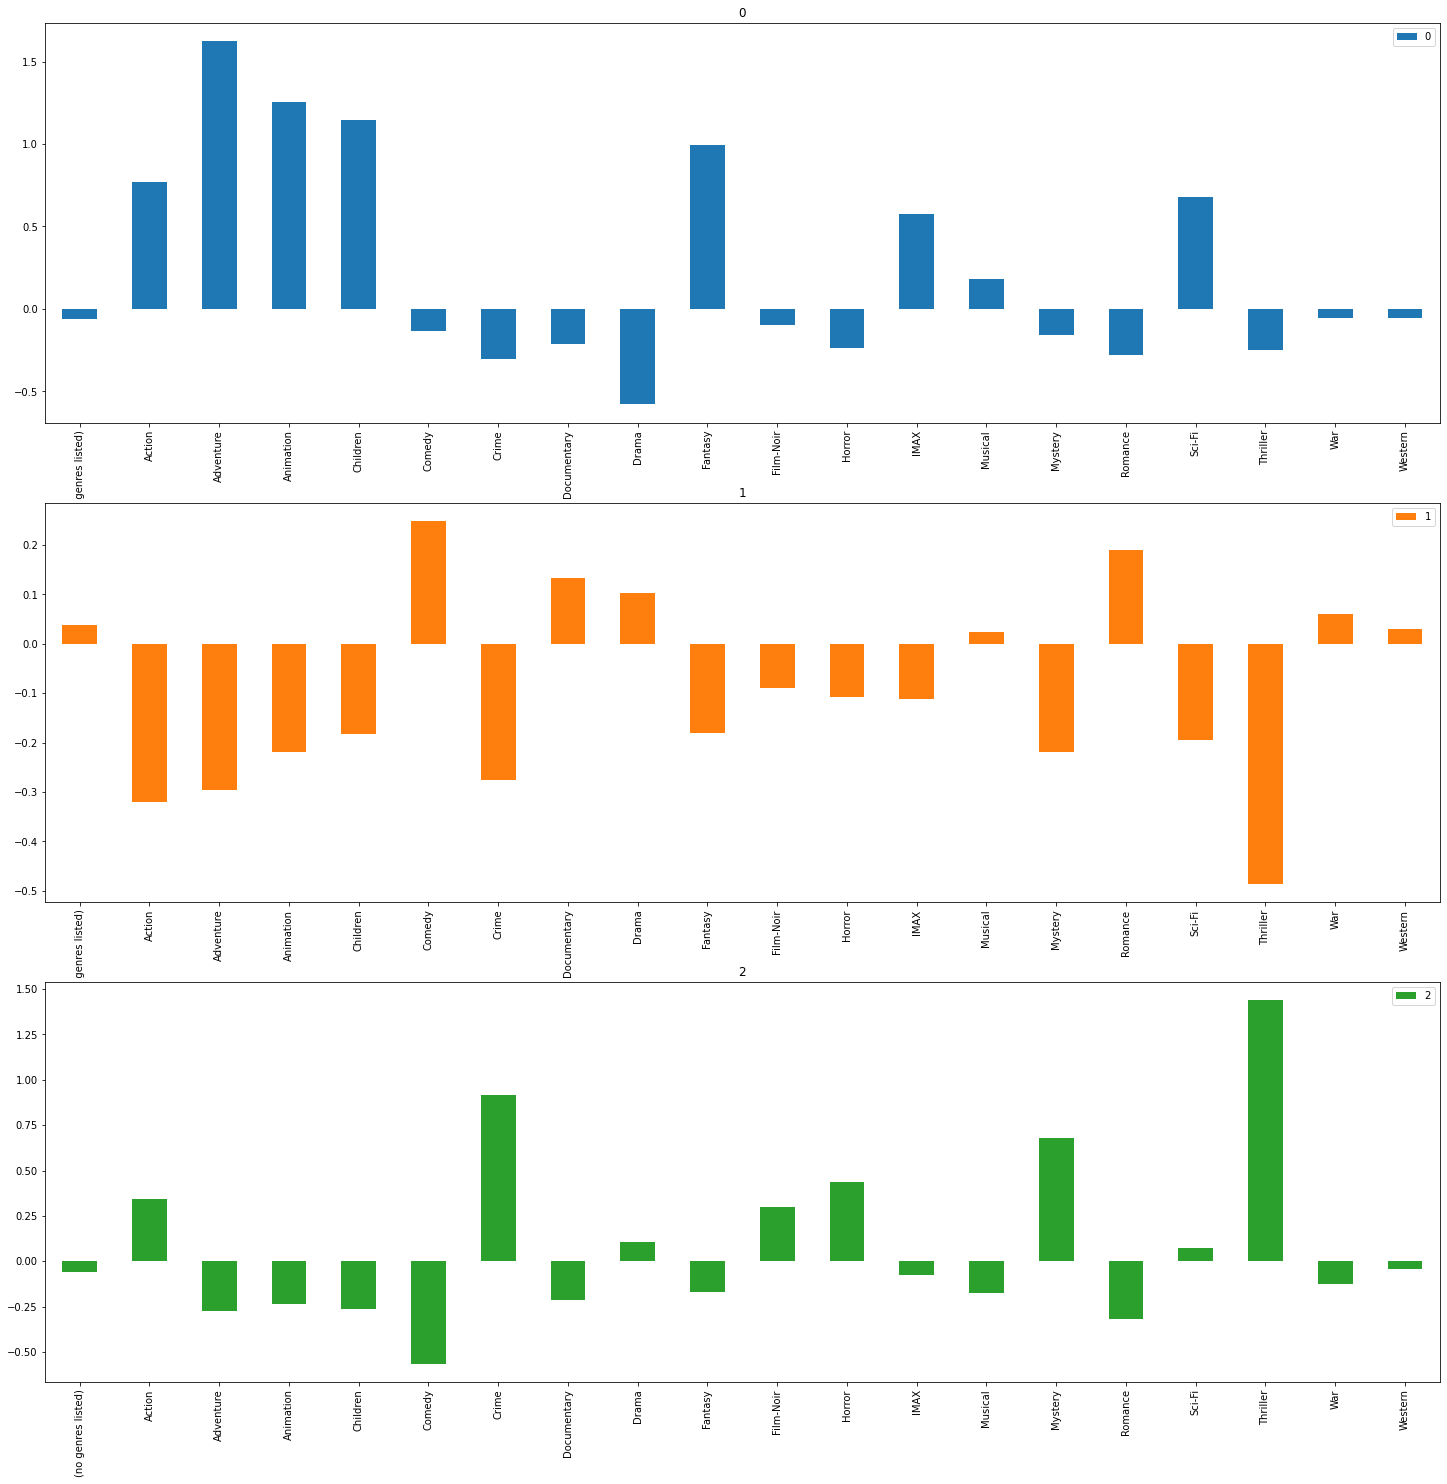

In [7]:
grupos.transpose().plot.bar(subplots=True, 
                figsize=(25, 25), 
                sharex=False)

In [8]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5096,8044,I Am a Fugitive from a Chain Gang (1932),Crime|Drama|Film-Noir,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
6442,51925,Premonition (2007),Drama|Fantasy|Mystery|Thriller,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0
6549,54787,Death Sentence (2007),Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4775,7108,Crime Story (Zhong an zu) (1993),Action|Crime|Drama,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
9144,147330,Sherlock Holmes and Dr. Watson: Acquaintance (...,Crime,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5056,7924,Stray Dog (Nora inu) (1949),Drama|Film-Noir|Thriller,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
8734,127132,Zipper (2015),Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5818,32029,Hostage (2005),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
5498,26375,Silver Streak (1976),Action|Comedy|Crime,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3664,5046,Impostor (2002),Action|Drama|Sci-Fi|Thriller,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0


In [9]:
from sklearn.manifold import TSNE



In [10]:
tsne = TSNE() 

visualizacao = tsne.fit_transform(generos_escalados) #transforma as 20 dimensões dos gêneros em 2D pra ser viasualizado via gráfico
visualizacao

array([[ 53.112186 ,  44.79786  ],
       [-36.042866 ,  18.174543 ],
       [ 21.550125 ,  11.11237  ],
       ...,
       [ -5.4589186,  16.937857 ],
       [ 29.466188 ,  43.315277 ],
       [ -6.556932 , -21.79826  ]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


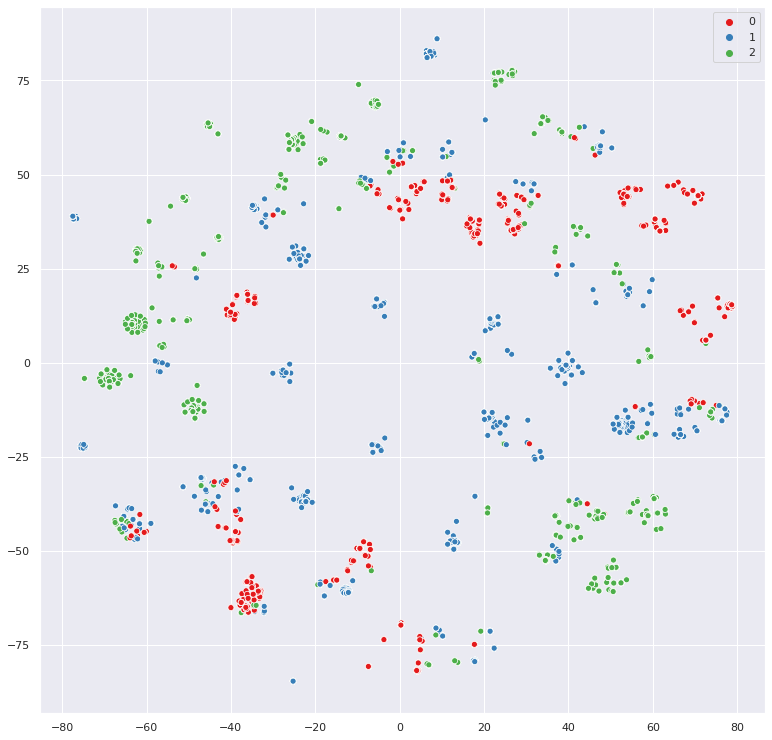

In [11]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13, 13)})


sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=modelo.labels_,
                palette=sns.color_palette('Set1',3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfbeb5c6d8>,
      dtype=object)

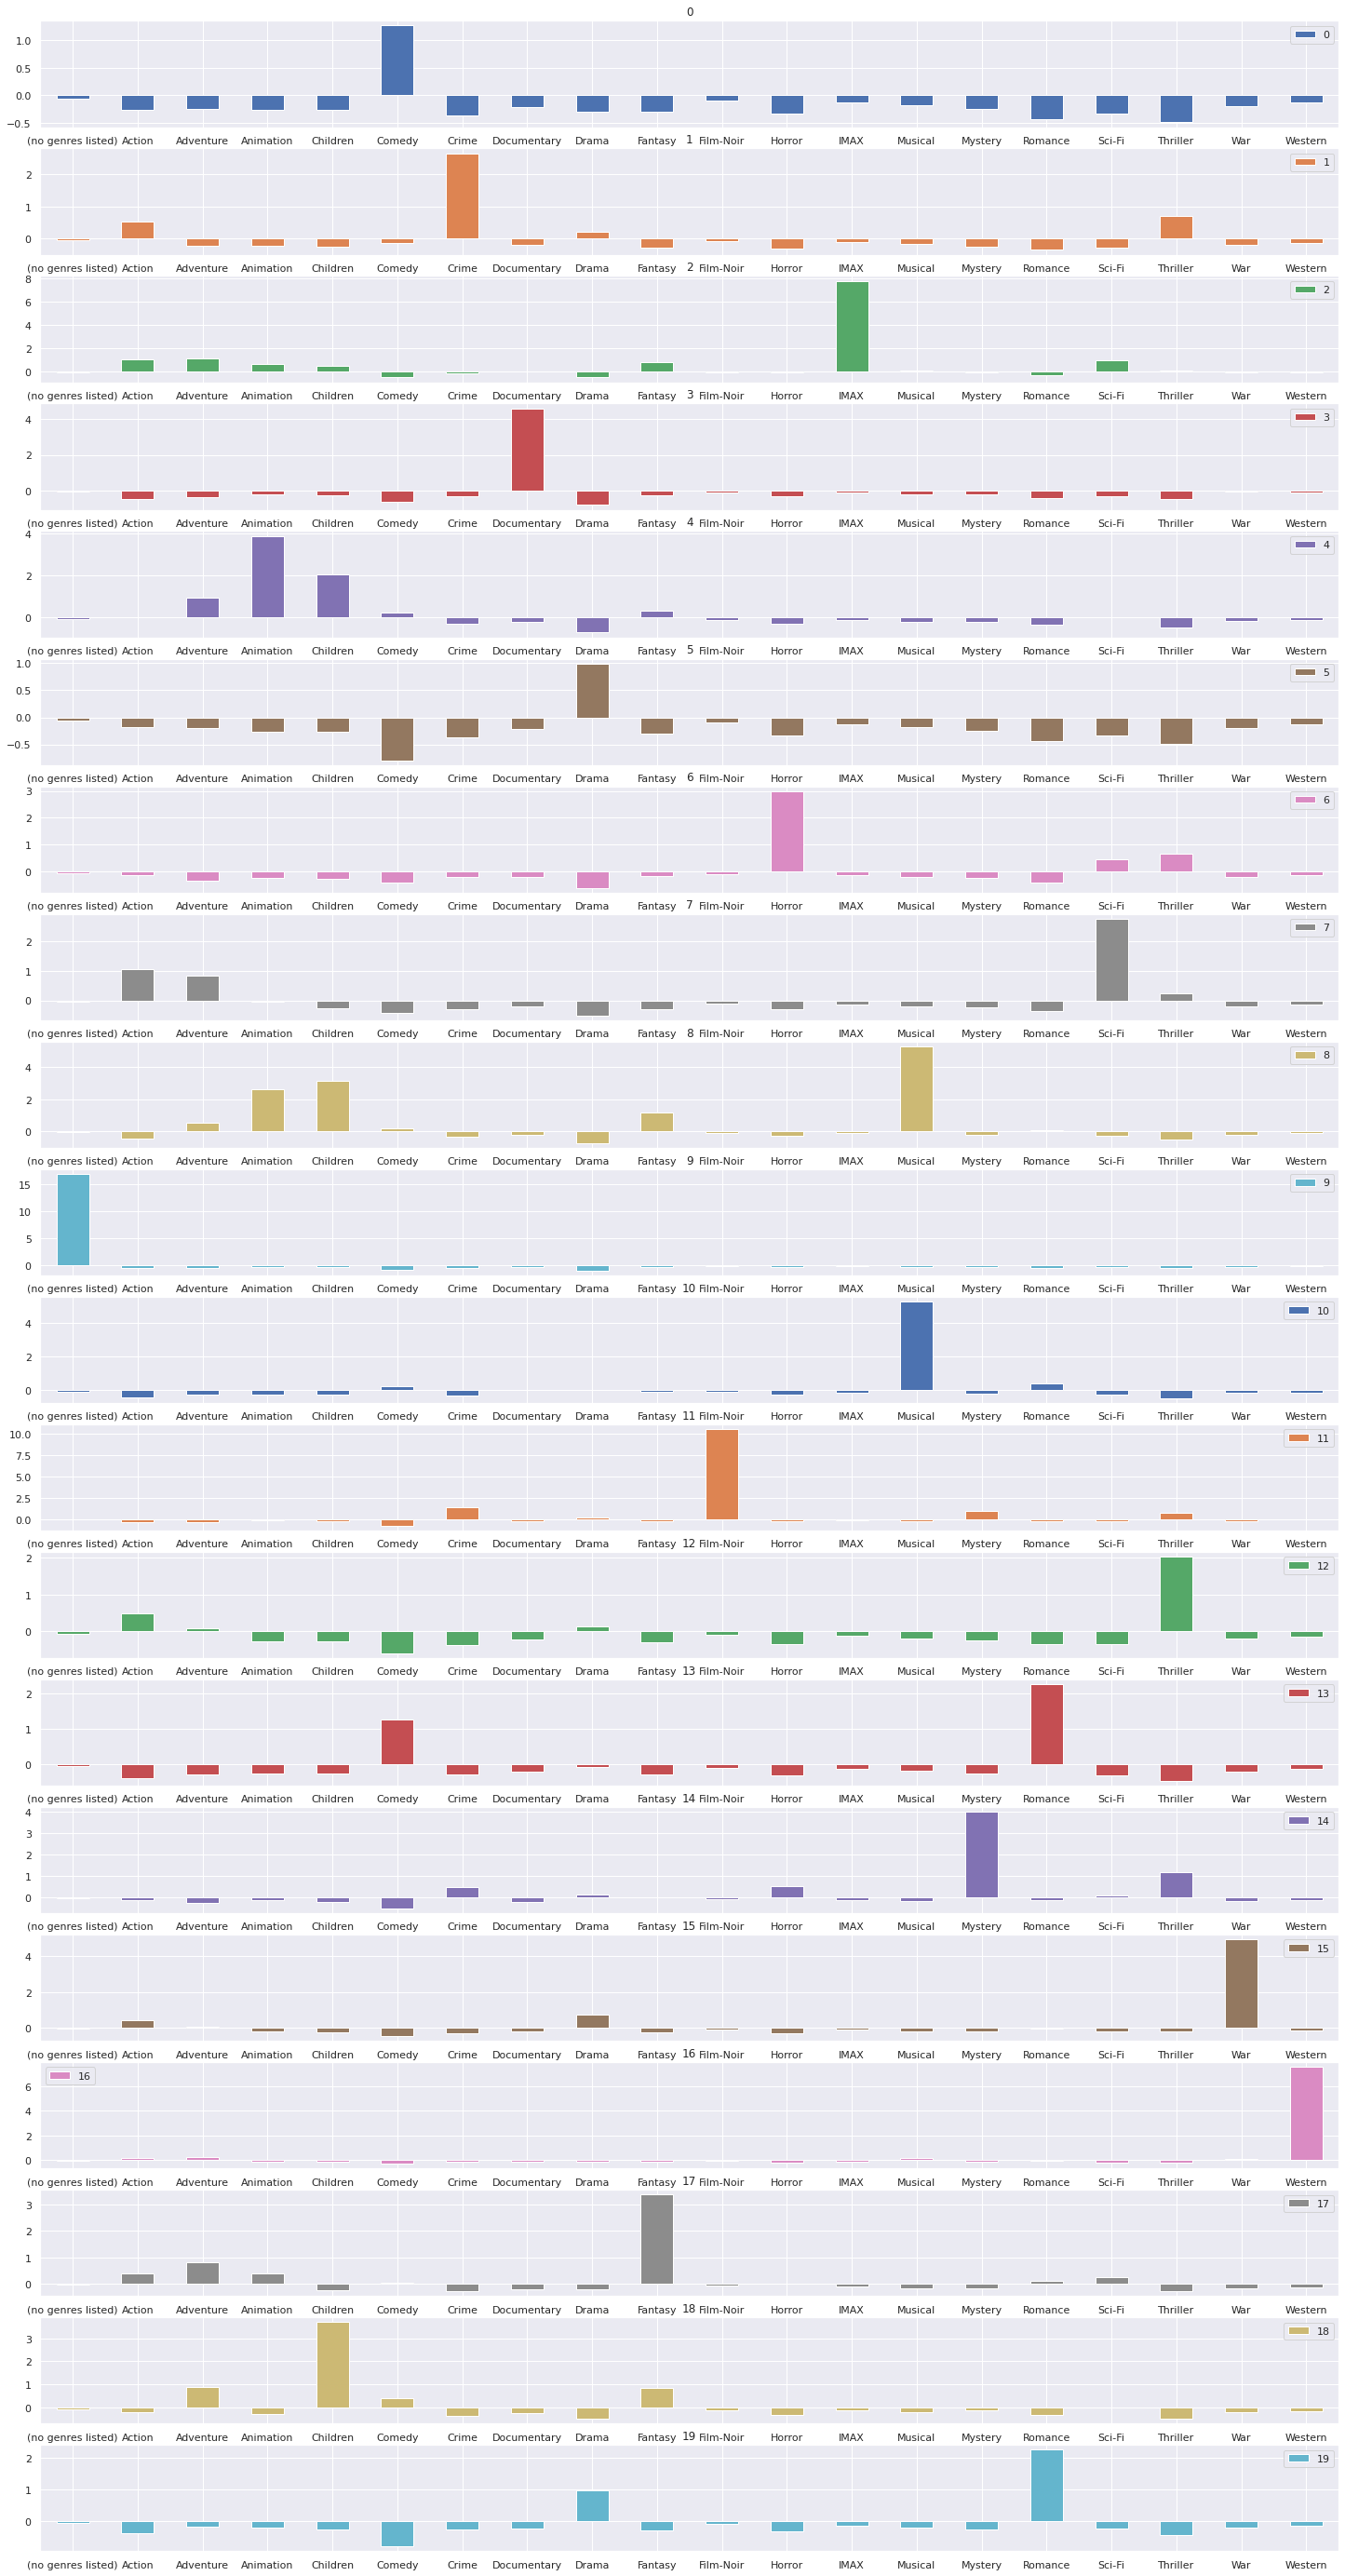

In [12]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
                            figsize=(25, 50),
                            sharex=False,
                            rot=0)

In [14]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [15]:
kmeans(20, generos_escalados)

[20, 55494.35428610791]

In [16]:
kmeans(3, generos_escalados)

[3, 166516.8100457482]

In [17]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179664.9990790031],
 [3, 166095.306574031],
 [4, 157486.30566560815],
 [5, 147052.16321283436],
 [6, 139123.48507882722],
 [7, 128160.01585438856],
 [8, 118855.25944124031],
 [9, 110255.55775129408],
 [10, 102373.84778393952],
 [11, 93955.74753038022],
 [12, 89104.55656418791],
 [13, 81741.57221770173],
 [14, 74457.56569100694],
 [15, 66818.37340218673],
 [16, 63109.220875160405],
 [17, 61581.0139722406],
 [18, 58980.456624713646],
 [19, 57124.56460256274],
 [20, 55598.747356950036],
 [21, 53607.75149218966],
 [22, 51742.549997269016],
 [23, 50189.15638545799],
 [24, 49091.43246891903],
 [25, 48060.62555697987],
 [26, 47284.13397605996],
 [27, 45232.823079841255],
 [28, 44688.09047452944],
 [29, 43212.18210406732],
 [30, 41881.072807904624],
 [31, 42137.49472352721],
 [32, 40901.30290134729],
 [33, 39909.60287465196],
 [34, 39953.41743677143],
 [35, 38410.80118769394],
 [36, 37495.125920515144],
 [37, 37222.650780153606],
 [38, 36657.727350614114],
 [39, 35166.6305

In [19]:
resultado = pd.DataFrame(resultado,
             columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179664.999079
2,3,166095.306574
3,4,157486.305666
4,5,147052.163213
5,6,139123.485079
6,7,128160.015854
7,8,118855.259441
8,9,110255.557751
9,10,102373.847784


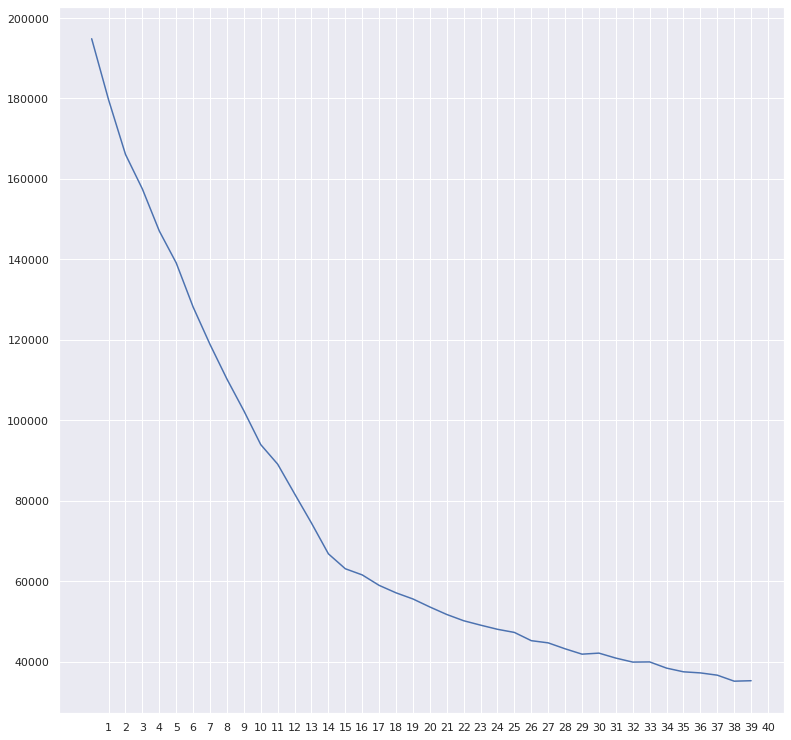

In [21]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfb58fe860>,
      dtype=object)

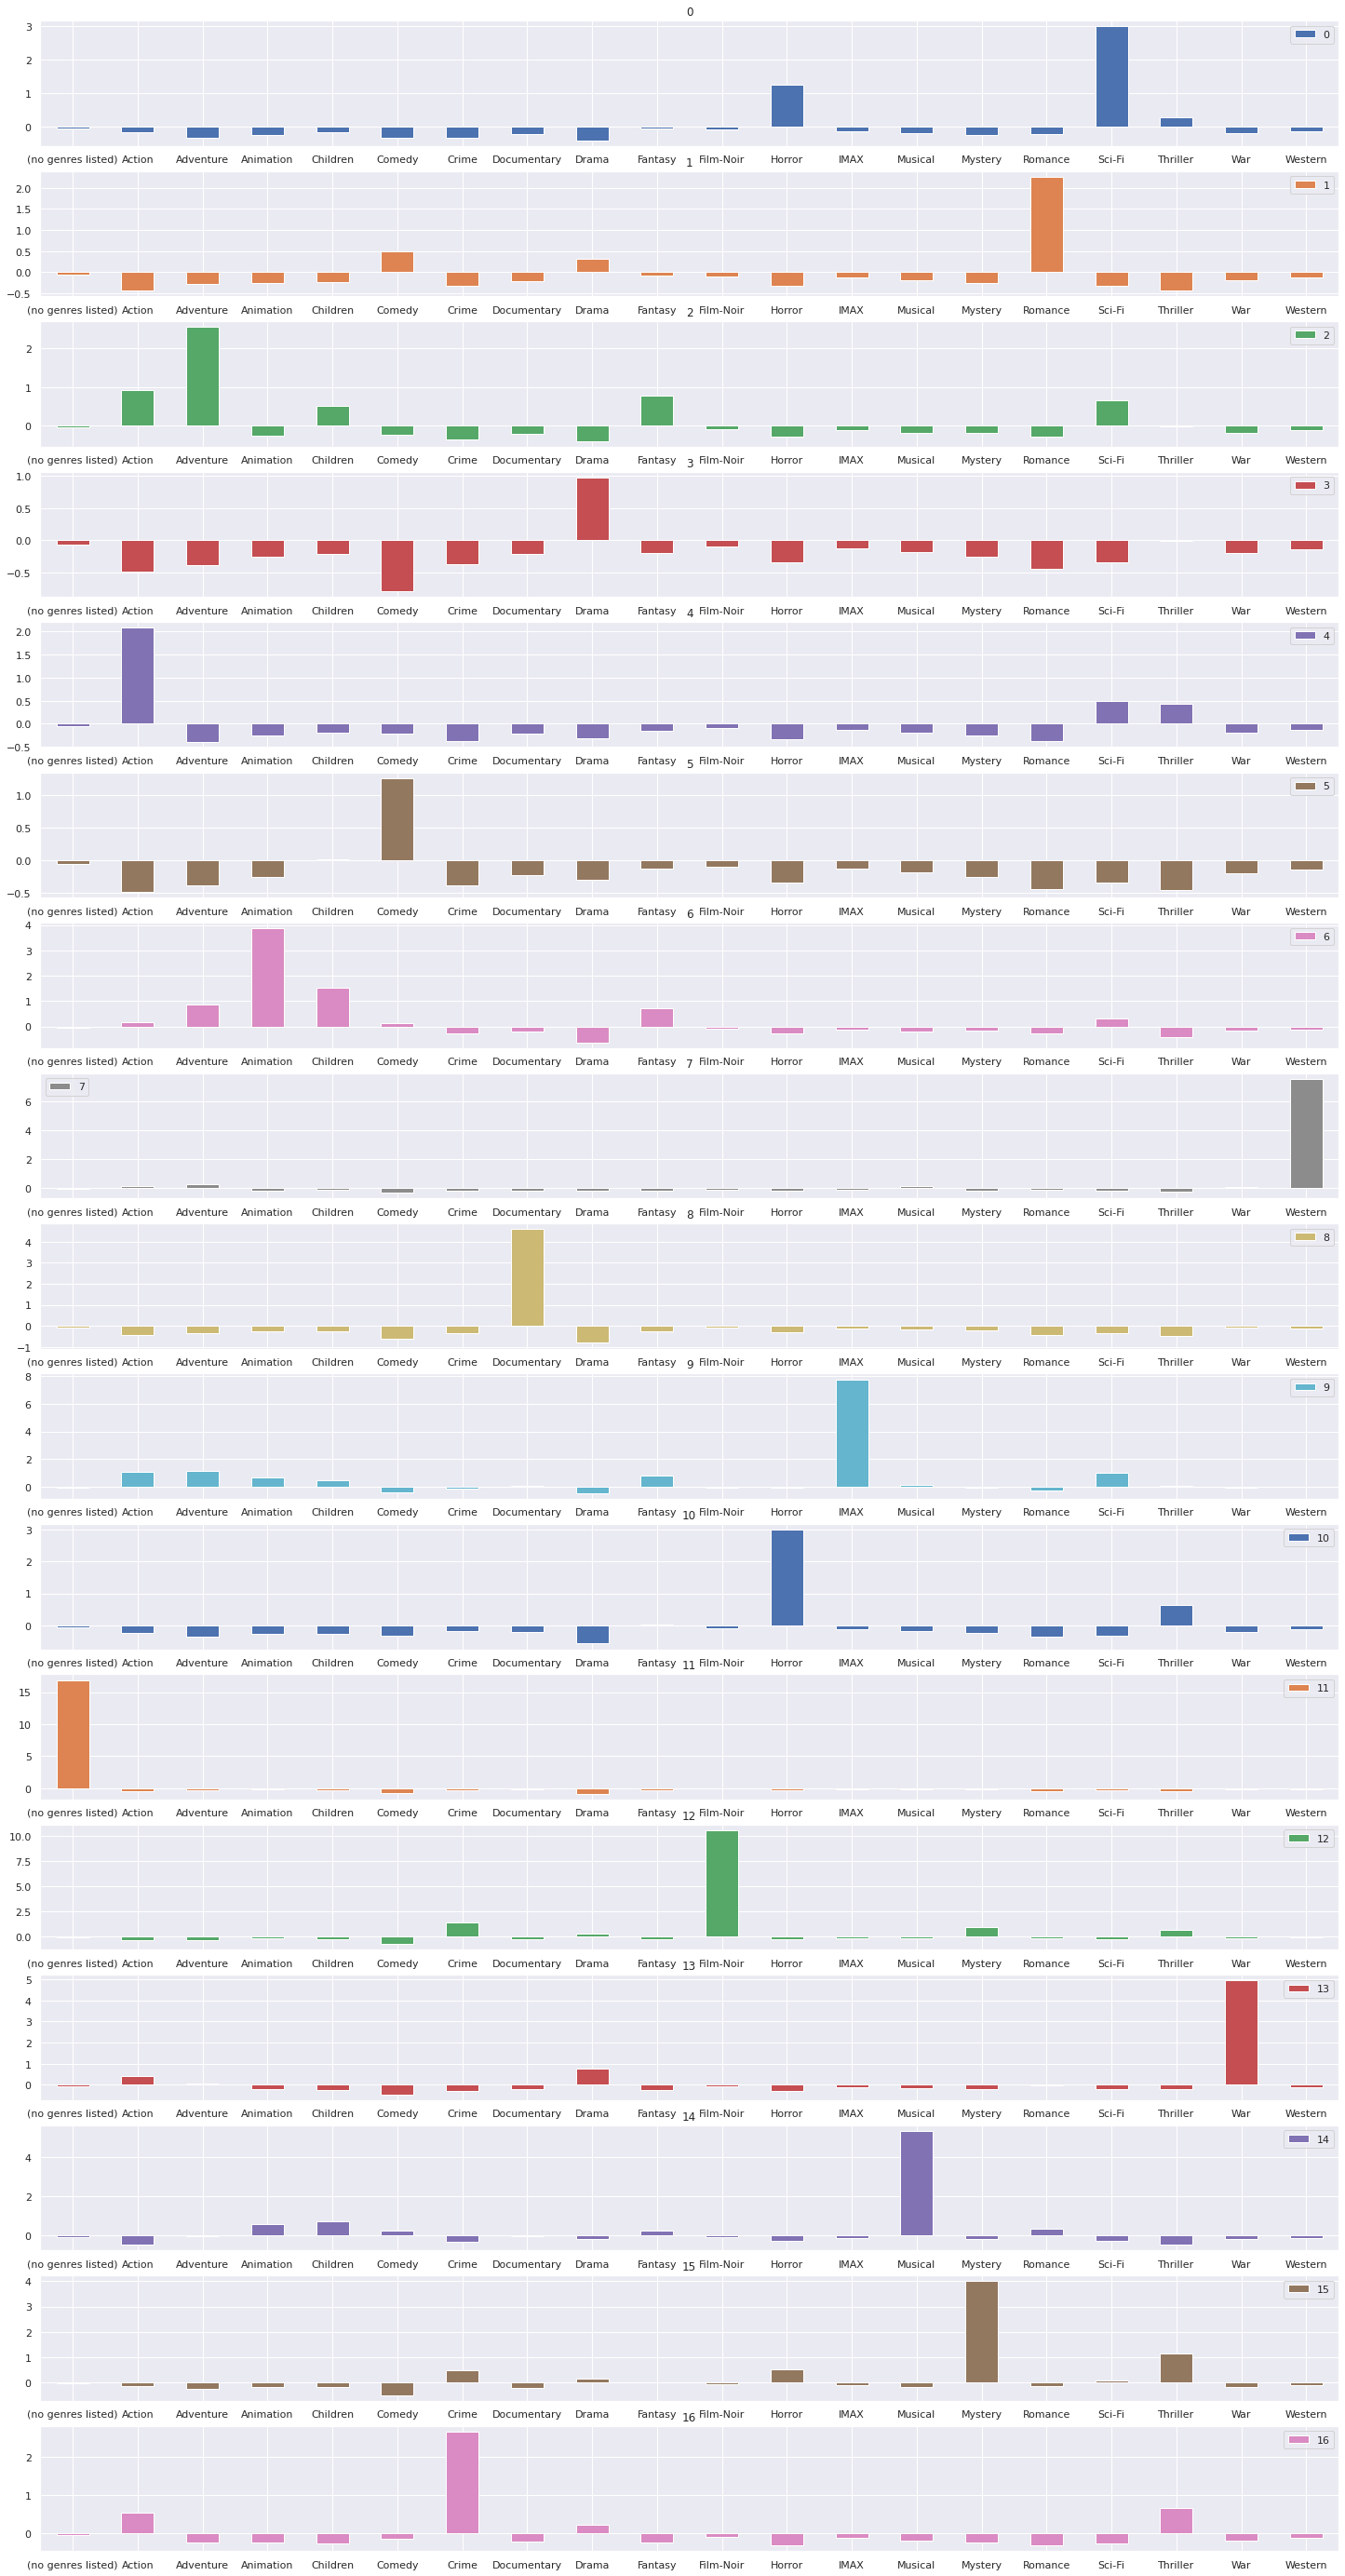

In [22]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                            figsize=(25, 50),
                            sharex=False,
                            rot=0)

In [25]:
grupo = 7

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3348,4535,"Man from Snowy River, The (1982)",Drama|Romance|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3207,4327,"Magnificent Seven, The (1960)",Adventure|Western,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3830,5375,"Harvey Girls, The (1946)",Comedy|Musical|Western,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
6850,61986,Appaloosa (2008),Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8752,128087,Trinity and Sartana Are Coming (1972),Comedy|Western,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5480,26258,"Topo, El (1970)",Fantasy|Western,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
903,1201,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6982,66785,"Good, the Bad, the Weird, The (Joheunnom nabbe...",Action|Adventure|Comedy|Western,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5992,37211,Go West (1940),Comedy|Musical|Western,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
229,266,Legends of the Fall (1994),Drama|Romance|War|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1


In [26]:
#Agrupamento hierárquico
from sklearn.cluster import AgglomerativeClustering

In [27]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [28]:
tsne = TSNE() 

visualizacao = tsne.fit_transform(generos_escalados) 
visualizacao

array([[ 60.62993  ,  10.323301 ],
       [ 53.24384  ,  29.283735 ],
       [-56.636875 ,  17.825909 ],
       ...,
       [  2.5632443, -12.9981   ],
       [ 35.14505  ,  13.618876 ],
       [-20.62316  ,  17.68958  ]], dtype=float32)

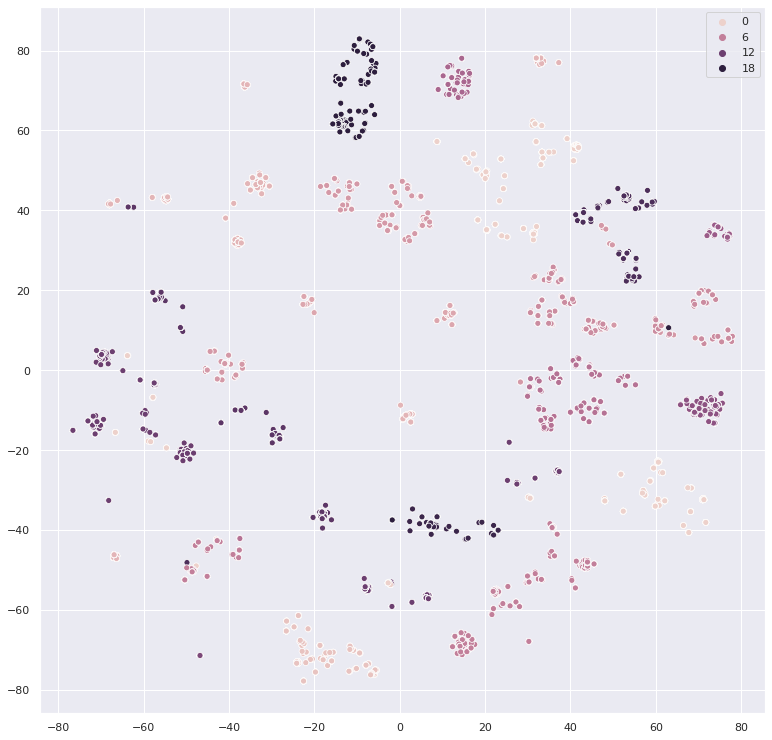

In [31]:
sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=grupos)

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfb4a3cb70>,
      dtype=object)

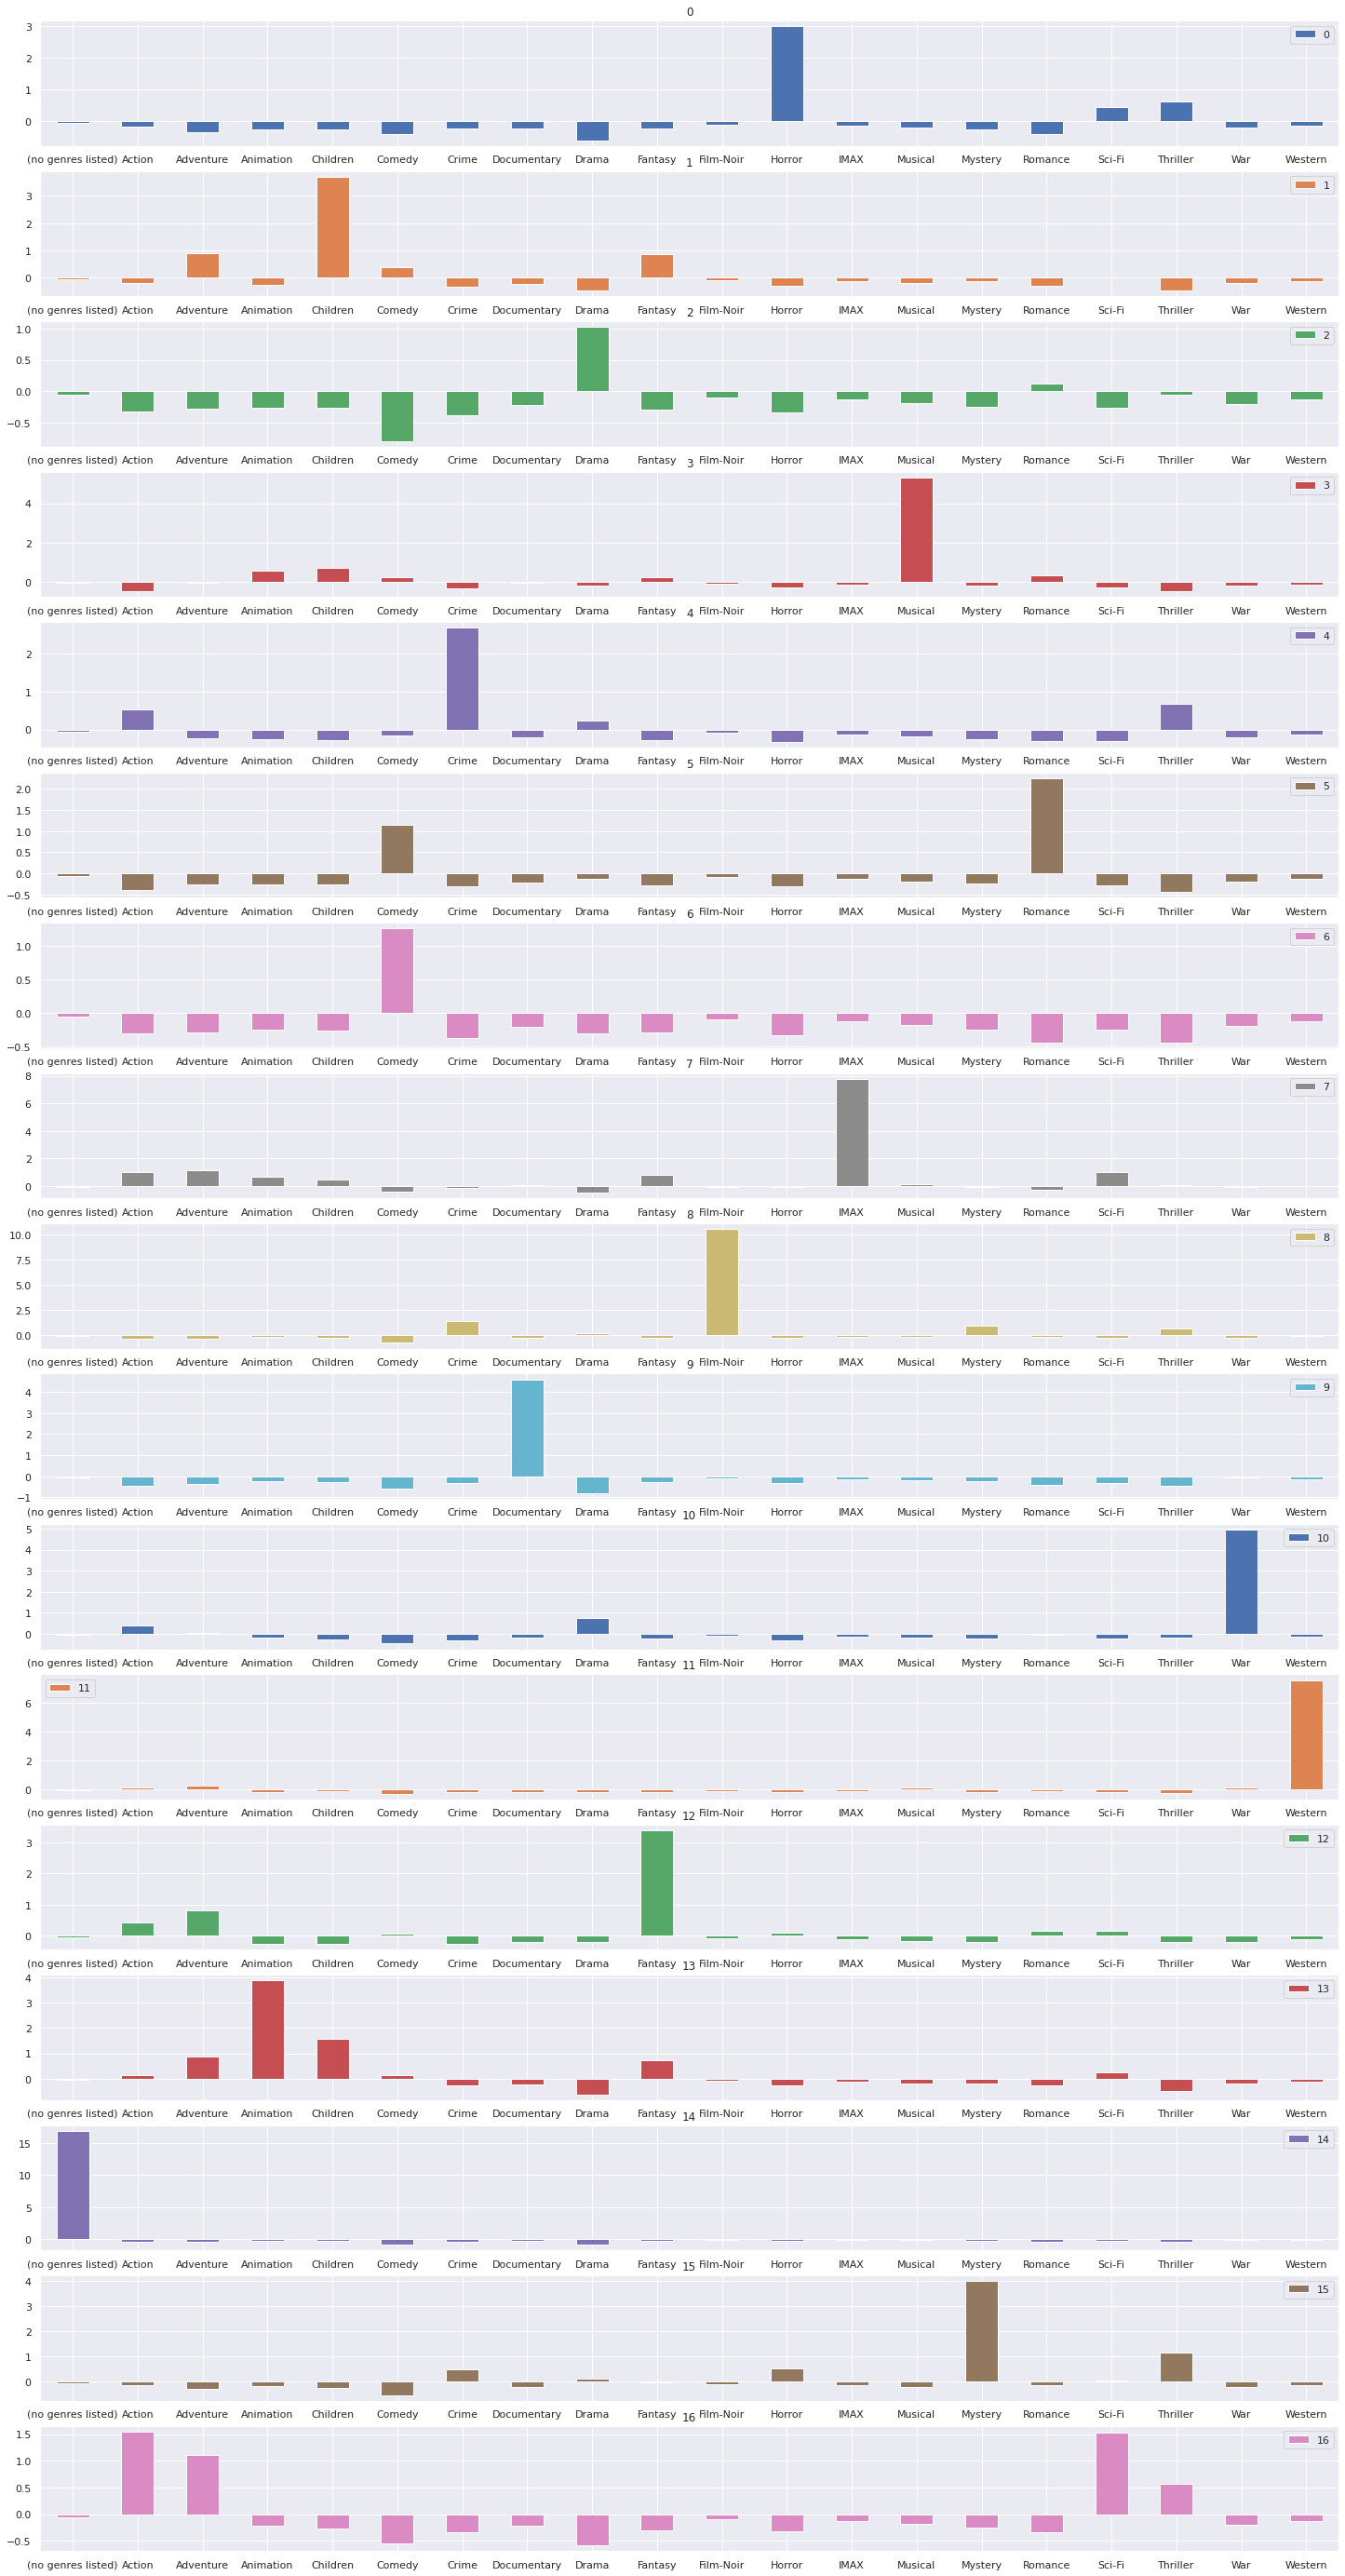

In [33]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                            figsize=(25, 50),
                            sharex=False,
                            rot=0)

In [35]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 2.        ,  6.        ,  2.53901997,  2.        ],
       [ 5.        , 17.        ,  2.71256017,  3.        ],
       [ 4.        , 18.        ,  3.42519375,  4.        ],
       [16.        , 19.        ,  3.4443127 ,  5.        ],
       [ 0.        , 20.        ,  3.89658379,  6.        ],
       [12.        , 21.        ,  4.18349988,  7.        ],
       [ 1.        , 22.        ,  4.40790795,  8.        ],
       [13.        , 23.        ,  4.67707328,  9.        ],
       [15.        , 24.        ,  4.71260185, 10.        ],
       [ 9.        , 25.        ,  5.19437033, 11.        ],
       [10.        , 26.        ,  5.23650143, 12.        ],
       [ 3.        , 27.        ,  5.82663583, 13.        ],
       [11.        , 28.        ,  7.87130949, 14.        ],
       [ 7.        , 29.        ,  8.14128307, 15.        ],
       [ 8.        , 30.        , 10.81582405, 16.        ],
       [14.        , 31.        , 17.08137004, 17.        ]])

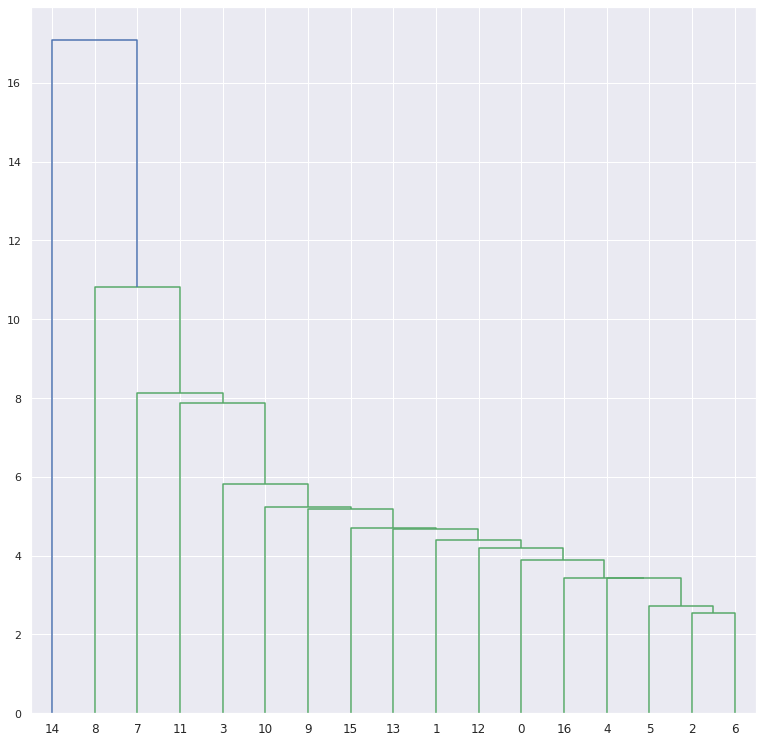

In [36]:
dendrograma = dendrogram(matriz_de_distancia)

In [37]:
from sklearn.cluster import DBSCAN

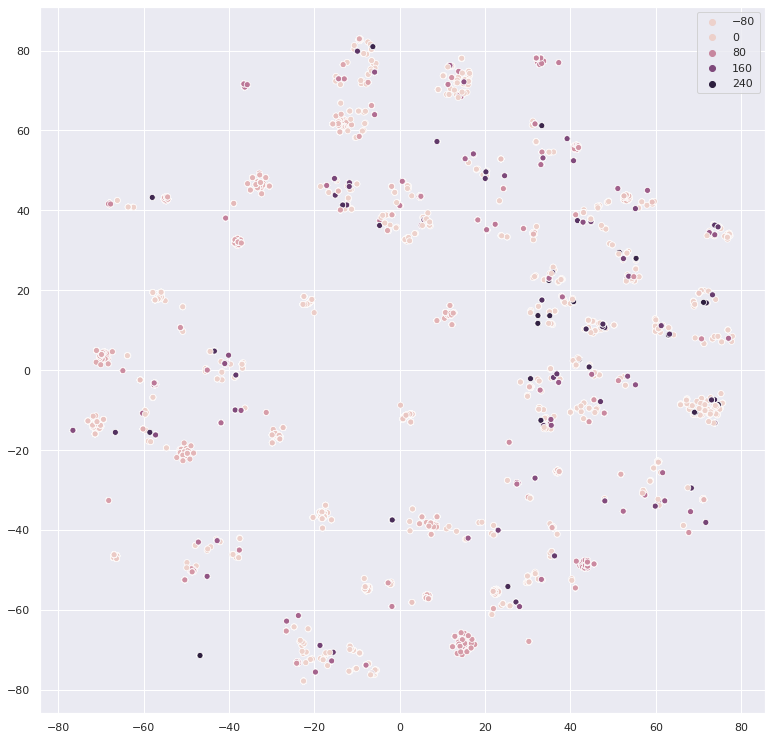

In [38]:
modelo = DBSCAN()
grupos = modelo.fit_predict(generos_escalados)

sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=grupos)
